# OkCupid Date-A Scientist

## Introduction

This project aims to predict an OkCupid user's smoking status from other available information they have provided. The data used in the project has been provided by Codecademy.

## The data

Let's begin by importing the necessary libraries and loading the data from the CSV file into a DataFrame.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('profiles.csv')

Let's take a first look at our data.

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
len(df)

59946

We have almost 60000 rows. Let's take a look at some summary statistics for our data.

In [5]:
df.describe(include='all')

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54458,52374,50308,48470,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,54350,51516,48635,43533,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


That's a lot of columns! Let's take a closer look at them and their respective datatypes.

In [6]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [7]:
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

No surprises here. We already know the target column is `smokes` and have a pretty good idea of what the features could be. Let's examine them further to make sure the actual values match our expectations.

In [8]:
for col in ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'height', 'income', 'job', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'smokes', 'speaks', 'status', 'location']: print(f"{col}: {df[col].unique()}")

age: [ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]
body_type: ['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
diet: ['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
drinks: ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
drugs: ['never' 'sometimes' nan 'often']
education: ['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on mast

There are a few things to notice here. Some columns have clearly missing values (`nan`), but there are also some missing values masked as real values. For example, both `body_type` and `job` columns have a `rather not say` value, while `status` has `unknown` as a value. These don't contain any real information, so it's probably best we remove them from our dataset, along with the `nan` values on all columns of interest. It also seems that all data was collected from users located in the US at the time.

## Data Preprocessing

In [9]:
data = df.dropna(subset=['age', 'drinks','education', 'sex', 'smokes', 'orientation', 'body_type', 'status', 'job', 'speaks', 'ethnicity'])
data = data.drop(data[data.body_type=='rather not say'].index)
data = data.drop(data[data.job=='rather not say'].index)
data = data.drop(data[data.status=='unknown'].index)
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single


Let's take a look at the `height` column again. 

In [10]:
data.groupby('height').count()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
height,,,,,,,,,,,,,,,,,,,,,
3.0,1,1,0,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
9.0,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,1,1,1,1,1
36.0,3,3,2,3,2,3,3,2,2,3,...,3,2,3,3,3,3,2,3,3,3
37.0,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
43.0,2,2,2,2,2,2,1,2,1,1,...,2,1,2,2,2,2,2,2,2,2
47.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
48.0,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
49.0,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
53.0,4,4,2,4,4,4,4,3,3,3,...,4,1,4,4,3,4,4,4,4,4


It appears there are some values that are too low. We'll remove these outliers that could negatively affect our model.

In [11]:
data = data.drop(data[data.height<10].index)

Let's look again at the remaining data.

In [12]:
data.describe(include='all')

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,38305.000000,38305,25571,38305,30971,38305,35456,34529,33286,32359,...,38305,17472,38305,28181,28587,38305,33227,38305,38305,38305
unique,NaN,11,18,6,3,32,35421,34126,32427,29465,...,169,15,3,15,45,2,48,5,5698,4
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,making people laugh.,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,10361,12646,28073,25502,16868,9,40,48,362,...,19713,5127,33155,10650,2024,23276,1251,31313,11914,35776
mean,32.802741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.755163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have around 40,000 rows now or 2/3 of the initial dataset. We won't drop more rows to avoid losing more data points, which could lead to overfitting. Now let's group our data by the `smokes` column in order to better understand our target variable.

In [13]:
data.groupby('smokes').count()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,last_online,location,offspring,orientation,pets,religion,sex,sign,speaks,status
smokes,,,,,,,,,,,,,,,,,,,,,
no,31313,31313,20732,31313,25571,31313,29115,28210,27181,26391,...,31313,31313,14326,31313,22837,23223,31313,26763,31313,31313
sometimes,2505,2505,1713,2505,1923,2505,2270,2251,2180,2114,...,2505,2505,1106,2505,1896,1904,2505,2289,2505,2505
trying to quit,984,984,662,984,772,984,882,892,856,842,...,984,984,491,984,800,779,984,943,984,984
when drinking,2161,2161,1552,2161,1596,2161,1967,1970,1902,1867,...,2161,2161,919,2161,1607,1637,2161,1977,2161,2161
yes,1342,1342,912,1342,1109,1342,1222,1206,1167,1145,...,1342,1342,630,1342,1041,1044,1342,1255,1342,1342


We observe that non-smokers make up the overwhelming majority of the entries in our DataFrame. In this context, it may be best to transform our target column by grouping all categories of smokers together.

In [14]:
data['smokes'] = data['smokes'].apply(lambda x: 0 if x == 'no' else 1)

In [15]:
data.groupby('drinks').count()

,age,body_type,diet,drugs,education,essay0,essay1,essay2,essay3,essay4,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
drinks,,,,,,,,,,,,,,,,,,,,,
desperately,180,180,148,136,180,167,161,156,151,153,...,180,95,180,133,149,180,153,180,180,180
not at all,2251,2251,1510,2139,2251,2093,2020,1970,1938,1957,...,2251,1177,2251,1724,1867,2251,2002,2251,2251,2251
often,3328,3328,2249,2572,3328,3077,3025,2942,2814,2934,...,3328,1480,3328,2537,2544,3328,2902,3328,3328,3328
rarely,4181,4181,2647,3716,4181,3883,3775,3652,3572,3545,...,4181,2055,4181,3111,3321,4181,3638,4181,4181,4181
socially,28073,28073,18792,22148,28073,25977,25299,24320,23638,24029,...,28073,12509,28073,20448,20472,28073,24285,28073,28073,28073
very often,292,292,225,260,292,259,249,246,246,234,...,292,156,292,228,234,292,247,292,292,292


In [16]:
data.groupby('smokes').count()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,last_online,location,offspring,orientation,pets,religion,sex,sign,speaks,status
smokes,,,,,,,,,,,,,,,,,,,,,
0,31313,31313,20732,31313,25571,31313,29115,28210,27181,26391,...,31313,31313,14326,31313,22837,23223,31313,26763,31313,31313
1,6992,6992,4839,6992,5400,6992,6341,6319,6105,5968,...,6992,6992,3146,6992,5344,5364,6992,6464,6992,6992


Since we have a lot of categorical variables, we will use a Decision Tree to predict a user's smoking status. But before we go ahead and discard all numerical data, it may be worth to examine whether there is a correlation with smoking status.

29.30320366132723
33.58416632069748


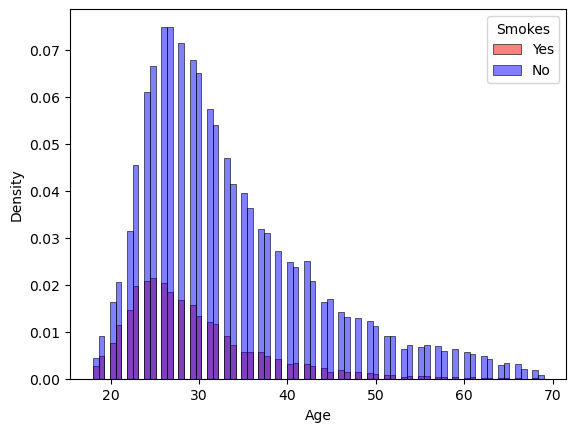

<Figure size 640x480 with 0 Axes>

In [17]:
print(data.age[data.smokes==1].mean())
print(data.age[data.smokes==0].mean())
sns.histplot(data=data, x='age', hue='smokes', alpha=0.5, stat='density', palette=['blue', 'red'])
plt.xlabel('Age')
plt.legend(['Yes', 'No'], title='Smokes')
plt.show()
plt.clf()

Let's see whether we can also extract some informationo from the `height` column.

68.76229977116705
68.28770798071089


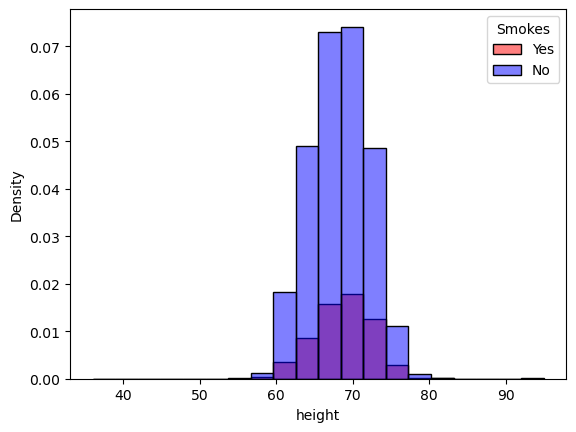

<Figure size 640x480 with 0 Axes>

In [18]:
print(data.height[data.smokes==1].mean())
print(data.height[data.smokes==0].mean())
sns.histplot(data=data, x='height', hue='smokes', alpha=0.5, stat='density', bins = 20, palette=['blue', 'red'])
plt.legend(['Yes', 'No'], title='Smokes')
plt.show()
plt.clf()

There is no stark difference in height between the two groups, so we can ignore that column.

Now we can prepare our data for the decision tree by one-hot encoding it.

In [19]:
features = pd.get_dummies(data[['drinks','education', 'sex', 'body_type', 'orientation', 'job', 'religion', 'ethnicity']], drop_first=True).join(data.age)

In [20]:
features.head()

,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,...,"ethnicity_pacific islander, hispanic / latin","ethnicity_pacific islander, hispanic / latin, other","ethnicity_pacific islander, hispanic / latin, white","ethnicity_pacific islander, hispanic / latin, white, other","ethnicity_pacific islander, other","ethnicity_pacific islander, white","ethnicity_pacific islander, white, other",ethnicity_white,"ethnicity_white, other",age
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,22
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,35
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,23
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,29
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,29


In [21]:
target = data.smokes

We'll split the data into training and testing subsets.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Building the Model

We will use Grid Search Cross Validation in order to find the best `max_depth` and `min_samples_split` for our tree. Since the vast majority of users are not smokers, even the simplest of algorithms can have a high accuracy by classifying every entry as a non-smoker. Thus, we will train the model to maximize the recall, so that it can more accurately identify smokers.

In [23]:
clf = DecisionTreeClassifier(random_state=42)

In [24]:
param_grid = {'max_depth': list(range(1, 16)), 'min_samples_split': [2, 3, 4]}

Even though we have over 300 feature columns, we limit our search to trees with a maximum depth of 15, in order to avoid overfitting.

In [25]:
param_distributions =  {'max_depth': np.random.randint(low=1, high=100, size=10), 'min_samples_split': [2, 3, 4]}

In [26]:
gs = GridSearchCV(clf, param_grid=param_grid, cv=10, scoring='recall')
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'min_samples_split': [2, 3, 4]},
             scoring='recall')

Now that we can 

In [27]:
dt = gs.best_estimator_
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

## Evaluating the Model

Let's take a look at some metrics for our model.

In [28]:
dt.score(x_train, y_train)

0.8539681503720141

In [29]:
dt.score(x_test, y_test)

0.8109907322803811

The estimator performs somewhat better on the training test, however the difference is not extreme. Let's take a look at some other metrics.

In [33]:
y_pred = dt.predict(x_test)
recall_score(y_test, y_pred)

0.11486001435750179

In [34]:
precision_score(y_test, y_pred)

0.4266666666666667

In [35]:
f1_score(y_train, dt.predict(x_train))

0.37263423524463757

In [36]:
confusion_matrix(y_test, y_pred)

array([[6053,  215],
       [1233,  160]], dtype=int64)

Let's take a look at what the most important features are. The following bar plot shows the [Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) gain for the 10 most important features of the algorithm. We will also plot the first 4 levels of a tree to better understand how the classifier uses them to predict the outcome.

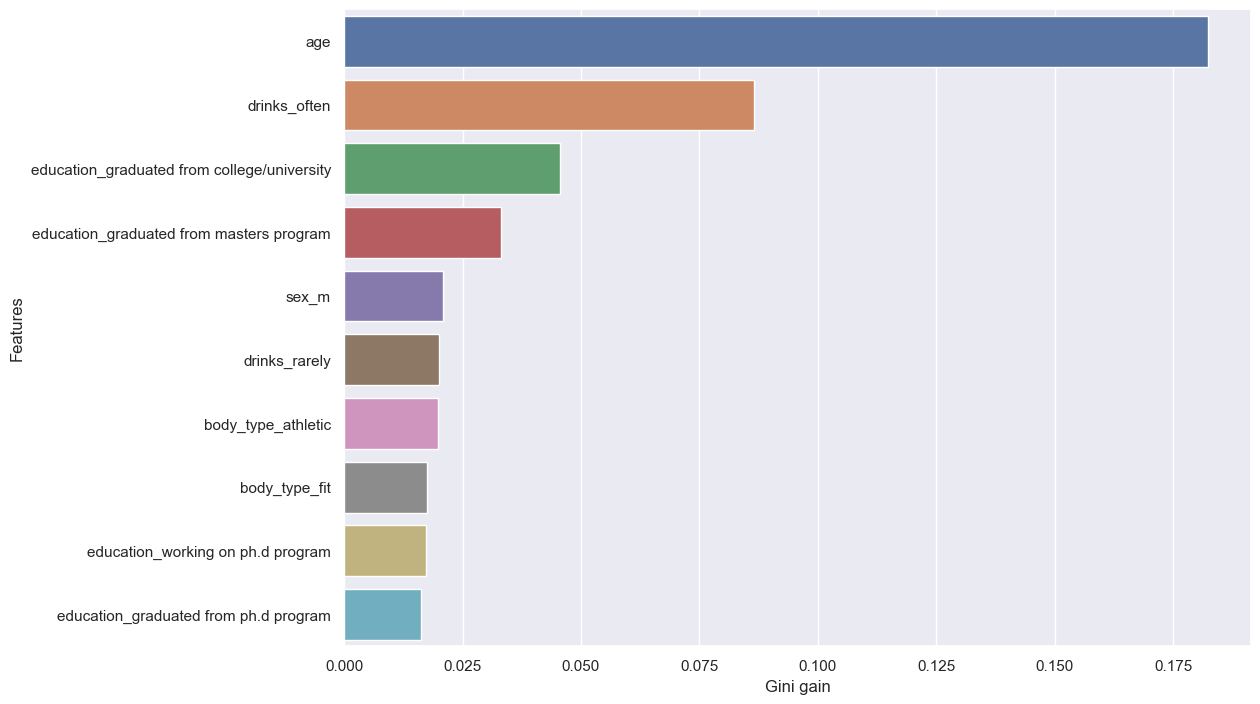

In [37]:
feature_importances = dt.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = features.columns[sorted_indices][:10]
sorted_importances = feature_importances[sorted_indices][:10]
 
# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.xlabel('Gini gain')
plt.ylabel('Features')
plt.show()

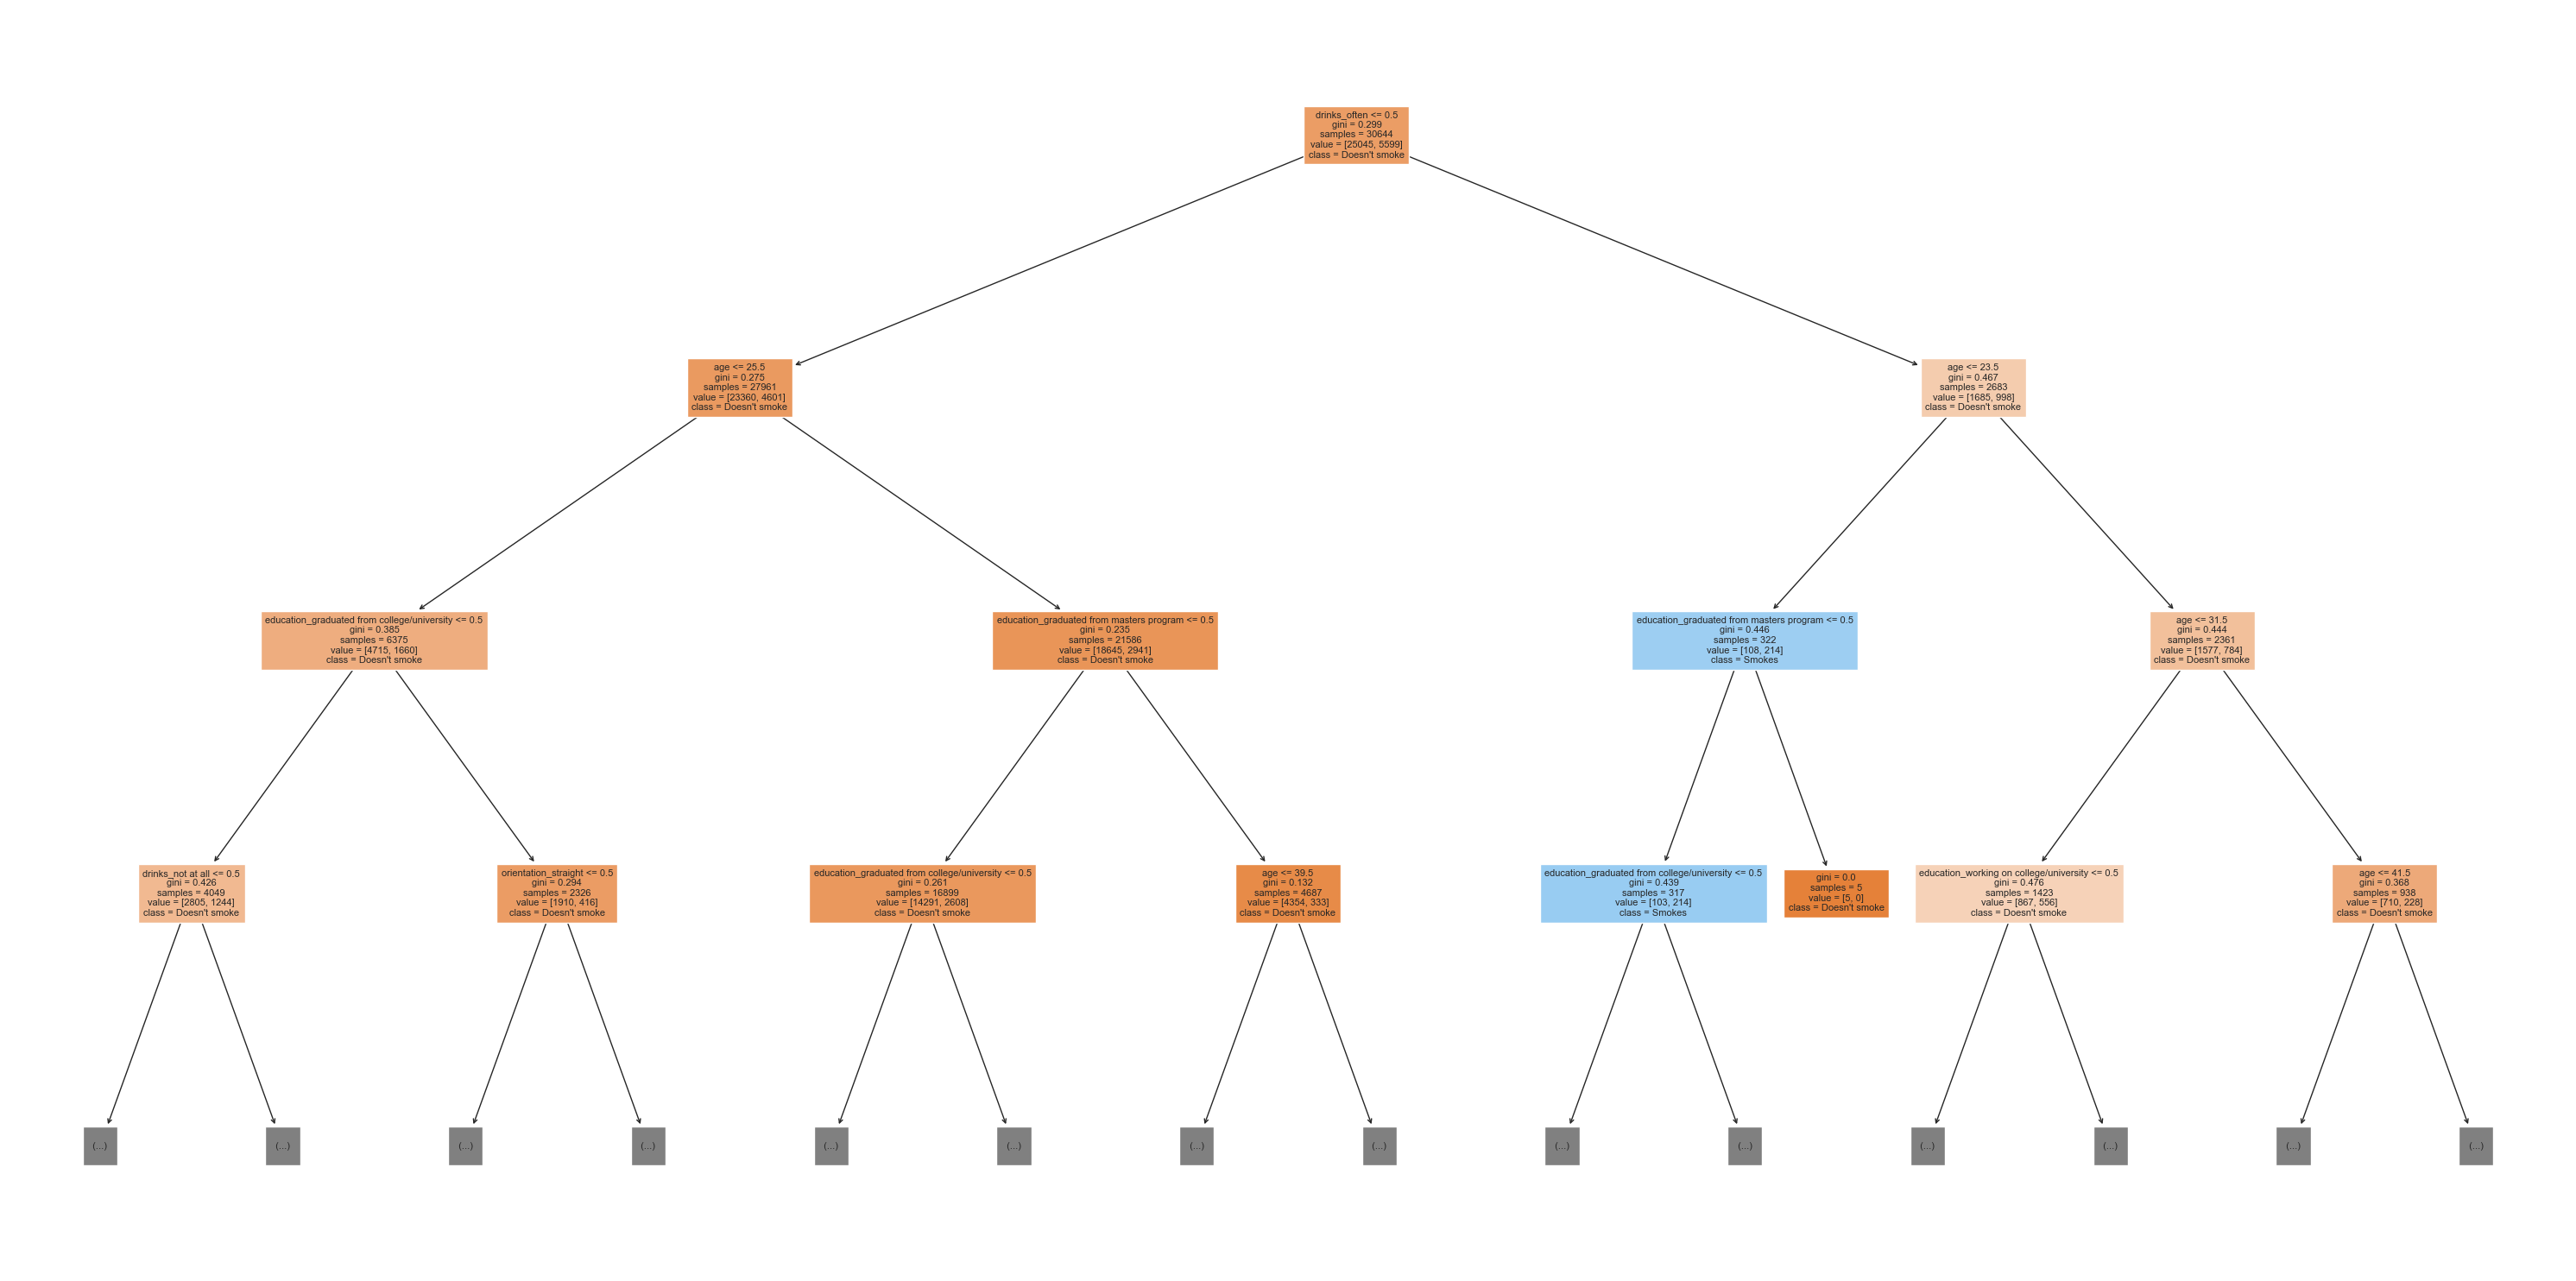

In [38]:
figure = plt.figure(figsize=(30, 15))
tree.plot_tree(dt, feature_names=list(x_train.columns), class_names=['Doesn\'t smoke', 'Smokes'], max_depth = 3, filled=True, fontsize=8)
plt.tight_layout()
plt.show()
figure.savefig('figure.png')

# Conclusions

* Age is by far the most important feature of the algorithm, as evidenced by the Gini gain compared to the other features.
* The next most important indicators are drinking often, graduation from college/university, and having a Master's degree.
* Despite the overall significance of age, the first split, occuring at the root node, is based on whether a user has stated that they drink often.
* The algorithm next splits based on age, although the threshold differs depending on the previous split.
* Overall, the decision tree has high accuracy but doesn't perform great based on other metrics. Considering the performance based on the appropriate evaluation method for our use case is crucial in order to not overestimate the algorithm's ability to make predictions.
* The algorithm's inability to predict every user's smoking status is not unexpected. We only have a small amount of relevant information about the users and thus can't consistently make reliable estimations based on that.
* We should also remember that this data was obtained from users of a dating app and therefore does not accurately represent the adult population of the United States. For example, the average age of the users appears to be significantly lower than that of the average adult.
* One way to expand this project would be taking into account other data fields. For example, using Natural Language Processing, one might obtain more helpful information from the essays on users' profiles. One limitation is that a lot of users won't have filled in all of these fields (or maybe any of them), which in turn means there would be fewer data points to work with.